# Thresholding
## This notebook outlines the concepts behind Thresholding used in Image processing

Thresholding is the **binarization** of an image
- Convert a grayscale image to a binary image, where the pixels are either 0 or 255

A **simple thresholding example** would be as follows:
- selecting a pixel value p
- Setting all pixel intensities less than p to zero
- Setting all pixel values greater than p to 255

In this way, we are able to create a **binary representation** of the image

Normally, we use thresholding to focus on objects or **areas of particular interest** in an image

### Types of Thresholding
- Simple Thresholding
- Adaptive Thresholding
- Otsu and Riddler-Calvard Thresholding
- Watershed

## SIMPLE THRESHOLDING

Applying simple thresholding methods requires **human intervention**
- Specify a threshold value **T**
- All pixel intensities **below** T are set to **0**
- All pixel intensities **greater** than T are set to **255**

**Inverse Binarization**

- Setting all pixels **below** T to **255**
- Setting all pixel intensities **greater** than T to **0**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Threshold the image
- Display the image

#### Import the necessary libraries

In [1]:
import cv2
import numpy as np

#### Load the image

In [27]:
image = cv2.imread("bike.jpg")

#### Convert the image into grayscale

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [29]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.threshold( )**
    - image
    - threshold value **T** (manual setting)
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Thresholding method
        - **THRESH_BINARY**
            - Pixel values greater than T are set to maximum value M
    - Returns
        - T (manually set)
        - thresholded image

In [30]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)

#### Display the thresholded image

In [31]:
cv2.imshow("Thresholding of Image", np.hstack([gray, blurred, thresh]))
cv2.waitKey(0)

-1

### Homework:
- Test whether using Blurring before Thresholding helps or not
    - Take more images
    - Run results with Blurring
    - Run results without Blurring
    - Compare and study the effects of blurring
- Also, try the other Thresholding methods
    - cv2.THRESH_TRUNC
    - cv2.THRESH_TOZERO
    - cv2.THRESH_TOZERO_INV

### Inverse Thresholding

In [32]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

In [33]:
cv2.imshow("Thresholding of Images", np.hstack([gray, blurred, thresh, threshInv]))
cv2.waitKey(0)

-1

### Extract the foreground

In [34]:
foreground = cv2.bitwise_and(image, image, mask = threshInv)

In [35]:
cv2.imshow("Thresholding of Images", np.hstack([gray, blurred, thresh, threshInv]))
cv2.imshow("Foreground extraction", np.hstack([image, foreground]))
cv2.waitKey(0)

-1

## ADAPTIVE THRESHOLDING

Drawbacks of Previous method
- Manually supply Threshold Value T
- Requires lots of experiments with different T

**Solution**: Adaptive Thresholding

Consider **small neighbors** of pixels and then find an **optimal threshold value** T for each neighbor

Useful
- High ranges of pixel intensities in the image
- Optimal value of T may change for different parts of the image

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Adaptive Threshold the image
- Display the image

#### Import the libraries

In [36]:
import cv2
import numpy as np

#### Load the image

In [38]:
image = cv2.imread("bike.jpg")

#### Convert the image into grayscale

In [39]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [40]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.adaptiveThreshold( )**
    - image
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Method to compute the thresholding
        - **ADAPTIVE_THRESH_MEAN_C**
            - Compute the mean of the neighborhood of pixels and treat it as T
        - **ADAPTIVE_THRESH_GAUSSIAN_C**
            - Compute the Weighted mean of the neighborhood of pixels and treat it as T
    - Thresholding Method
        - **THRESH_BINARY_INV**
            - If any pixel greater than T in the neighborhood should be set to 255
            - If any pixel less than T, set to 0
    - Neighborhood size
        - Smaller square region for consideration to compute threshold
    - C
        - Integer that is subtracted from the mean allowing us to fine-tune our thresholding
    - Returns
        - T (manually set)
        - thresholded image

In [41]:
thresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               11, 
                               4
)

#### Display the Thresholded image

In [42]:
cv2.imshow("Adaptive Thresholding of Image", np.hstack([gray, blurred, thresh]))
cv2.waitKey(0)

-1

### Try Gaussian Thresholding

In [43]:
gaussianthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               15, 
                               3
)

In [44]:
cv2.imshow("Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))
cv2.waitKey(0)

-1

### Extract Foreground

In [45]:
foregroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

In [46]:
cv2.imshow("Gaussian Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))
cv2.imshow("Foreground extraction using Gaussian", np.hstack([image, foregroundgaussian]))
cv2.waitKey(0)

-1

## OTSU THRESHOLDING

Otsu’s method assumes there are **two peaks** in the grayscale histogram of the image
It then tries to find an optimal value to **separate** these two peaks – thus our value of T

Note: Please install **mahotas**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Otsu Threshold the image
- Display the image

#### Import the ncessary libraries

In [47]:
import cv2
import numpy as np
import mahotas

#### Load the image

In [48]:
image = cv2.imread("bike.jpg")

#### Convert the image into grayscale

In [49]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [50]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### OTSU Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**otsu**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

##### Find the optimal threshold of the image - Use OTSU

In [51]:
T = mahotas.thresholding.otsu(blurred)

##### What's the value of T?

In [52]:
T

113

#### Apply threshold
##### Copy the image

In [53]:
thresh = image.copy()

##### Set to white pixel if pixel intensity greater than T

In [54]:
thresh[thresh > T] = 255

##### Set to black pixel if pixel intensity less than 255

In [55]:
thresh[thresh < 255] = 0

##### Invert the thresholding
- Use cv2.bitwise_not

In [56]:
thresh = cv2.bitwise_not(thresh)

##### Display the image

In [57]:
cv2.imshow("OTSU Thresholding of Images", np.hstack([image, thresh]))
cv2.waitKey(0)

-1

## RIDDLER-CALVARD THRESHOLDING

#### RC Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**rc**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

In [58]:
T_RC = mahotas.thresholding.rc(blurred)

In [59]:
thresh_RC = image.copy()

In [60]:
thresh_RC[thresh_RC > T_RC] = 255

In [61]:
thresh_RC[thresh_RC < 255] = 0

In [62]:
thresh_RC = cv2.bitwise_not(thresh_RC)

In [63]:
cv2.imshow("RC Thresholding of Images", np.hstack([image, thresh_RC]))
cv2.waitKey(0)

-1

# Assignment: Try to segment foreground objects from the background

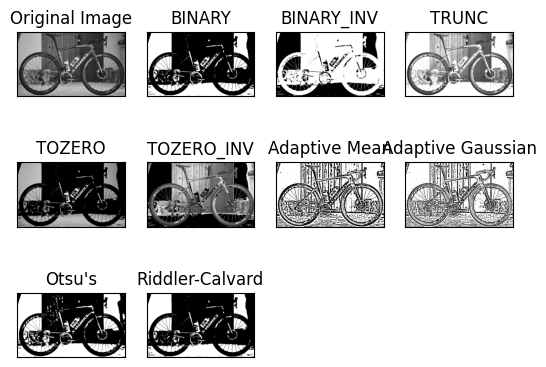

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('bike.jpg', 0)

# Apply different thresholding techniques
_, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

# Apply Adaptive Mean Thresholding
thresh_adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Adaptive Gaussian Thresholding
thresh_adaptive_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Otsu's Thresholding
_, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Riddler-Calvard method
try:
    import skimage.filters
    thresh_value_rc = skimage.filters.threshold_minimum(image)
    thresh_RC = image > thresh_value_rc
except ImportError:
    print("Scikit-image module is required for Riddler-Calvard method")

# Display the images
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV', 'Adaptive Mean', 'Adaptive Gaussian', "Otsu's", 'Riddler-Calvard']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5, thresh_adaptive_mean, thresh_adaptive_gauss, thresh_otsu, thresh_RC]

for i in range(10):
    plt.subplot(3, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()